In [20]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
def load_data(data):
  x = data.data
  y = data.target

  return x, y

In [22]:
def Classifier(model,data,label):
  x_train,x_test,y_train,y_test = train_test_split(data,label,test_size=0.2,random_state=21)

  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)

  print('< '+ model.__class__.__name__+ ' >')
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test, y_pred))
  print('-------------------------------------------------')
  print(' ')

  return y_pred



In [23]:
decisionTree = DecisionTreeClassifier(random_state=32)
randomForest = RandomForestClassifier(random_state=32)
svm_model = svm.SVC()
sgd_model = SGDClassifier()
logistic = LogisticRegression()

**DIGIT** **CLASSIFICATION**

In [14]:
digits = load_digits()
digits_data , digits_target = load_data(digits)


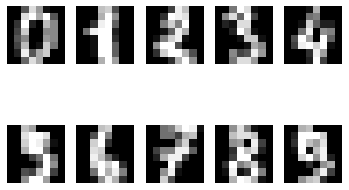

In [15]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [17]:
print(digits_target.shape)
digits_target[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
d_dt = Classifier(decisionTree,digits_data,digits_target)
d_rf = Classifier(randomForest,digits_data,digits_target)
d_svm = Classifier(svm_model,digits_data,digits_target)
d_sgd = Classifier(sgd_model,digits_data,digits_target)
d_log = Classifier(logistic,digits_data,digits_target)

< DecisionTreeClassifier >
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.93      0.72      0.81        36
           2       0.96      0.73      0.83        30
           3       0.74      0.83      0.78        41
           4       0.80      0.88      0.84        32
           5       0.90      0.93      0.91        46
           6       0.93      0.88      0.90        32
           7       0.90      0.93      0.91        40
           8       0.77      0.81      0.79        42
           9       0.69      0.76      0.72        29

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360

[[30  0  0  1  1  0  0  0  0  0]
 [ 0 26  0  1  2  2  0  0  3  2]
 [ 0  1 22  3  1  1  0  1  1  0]
 [ 0  0  0 34  0  1  0  1  3  2]
 [ 0  0  0  1 28  0  1  1  0  1]
 [ 2  0  0  0  0 43  0  0  1  0]
 [ 0  0  0  1  1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


 - **Data** **analysis**  : 이미지 데이터를 plt.show 로 확인
 - **evaluation** **metrics** : 숫자 분류에 있어서 recall 보다 precision 이 더 중요하다 생각해 accuracy 기준으로 0.99 를 기록한 SVM 을 선정 



**WINE** **CLASSIFICATION**

In [27]:
wine = load_wine()
wine_data , wine_target = load_data(wine)

In [28]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [30]:
print(wine_data.shape)
print(wine_target.shape)

(178, 13)
(178,)


In [50]:
w_dt = Classifier(decisionTree,wine_data,wine_target)
w_rf = Classifier(randomForest,wine_data,wine_target)
w_svm = Classifier(svm_model,wine_data,wine_target)
w_sgd = Classifier(sgd_model,wine_data,wine_target)
w_log = Classifier(logistic,wine_data,wine_target)

< DecisionTreeClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.80      0.80      0.80        10
           2       0.89      0.73      0.80        11

    accuracy                           0.86        36
   macro avg       0.86      0.84      0.85        36
weighted avg       0.86      0.86      0.86        36

[[15  0  0]
 [ 1  8  1]
 [ 1  2  8]]
-------------------------------------------------
 
< RandomForestClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[15  0  0]
 [ 0 10  0]
 [ 0  0 11]]
------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

- **Data** **analysis**  : 데이터의 수가 작아 특별한 분석 하지 않음
- **evaluation** **metrics** : RandomForestClassifier 와 Logisticsregression 모두 precision 과 recall 이 1 로 이 두 모델이 가장 성능이 좋은 것으로 판단

**BREAST** **CANCER** **CLASSIFICATION**

In [24]:
breast_cancer = load_breast_cancer()
cancer_data, cancer_target = load_data(breast_cancer)

In [25]:
cancer_df = pd.DataFrame(data=cancer_data, columns=breast_cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [53]:
c_dt = Classifier(decisionTree,cancer_data,cancer_target)
c_rf = Classifier(randomForest,cancer_data,cancer_target)
c_svm = Classifier(svm_model,cancer_data,cancer_target)
c_sgd = Classifier(sgd_model,cancer_data,cancer_target)
c_log = Classifier(logistic,cancer_data,cancer_target)

< DecisionTreeClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.96      0.95      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

[[36  3]
 [ 4 71]]
-------------------------------------------------
 
< RandomForestClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[37  2]
 [ 1 74]]
-------------------------------------------------
 
< SVC() >
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


- **Data** **analysis**  : dataFrame 을 이용해 데이터의 형태를 시각적으로 확인
- **evaluation** **metrics** : 전반적인 성능은 비슷하지만, 암세포를 진단하는데에 있어서 아픈사람을 안아프다고 진단하는것이 훨씬 위험하기 때문에 recall 을 기준으로 RandomForestClassifier 를 선정